In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
ROOT = "/content/drive/MyDrive/Collab notebook/Assignment/Cifer10"
os.chdir(ROOT)
assert ROOT == os.getcwd()

In [4]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

print("The MNIST dataset has a training size of %d examples" %len(X_train))
print("The MNIST dataset has a test size of %d examples" %len(X_test))

170500096/170498071 [==============================] - 5s 0us/step
The MNIST dataset has a training size of 50000 examples
The MNIST dataset has a test size of 10000 examples


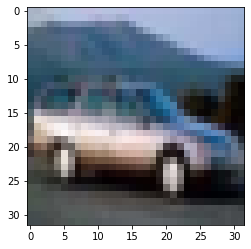

In [5]:
plt.imshow(X_train[4])

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shaoe:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shaoe: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
img_rows, img_cols = 32, 32

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (32, 32, 3)
x_train shape: (50000, 32, 32, 3)


In [12]:
## Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(32,32,3)))
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [13]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 47s 10ms/step - loss: 1.4636 - accuracy: 0.4737 - val_loss: 1.0334 - val_accuracy: 0.6383

Epoch 00001: val_loss improved from inf to 1.03340, saving model to model.weights.best.hdf5
Epoch 2/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9058 - accuracy: 0.6840 - val_loss: 0.7978 - val_accuracy: 0.7240

Epoch 00002: val_loss improved from 1.03340 to 0.79775, saving model to model.weights.best.hdf5
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6993 - accuracy: 0.7604 - val_loss: 0.7540 - val_accuracy: 0.7405

Epoch 00003: val_loss improved from 0.79775 to 0.75401, saving model to model.weights.best.hdf5
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5761 - accuracy: 0.8036 - val_loss: 0.8087 - val_accuracy: 0.7466

Epoch 00004: val_loss did not improve from 0.75401
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.

In [14]:
## Model 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model_2 = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model_2.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='elu',input_shape=(32,32,3)))
model_2.add(Conv2D(64, kernel_size=(3, 3),activation='elu',input_shape=(32,32,3)))
model_2.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='elu',input_shape=(32,32,3)))
# POOL_1: downsample the image to choose the best features 
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model_2.add(Conv2D(64, (3, 3),padding='same', activation='elu'))
model_2.add(Conv2D(128, (3, 3),padding='same', activation='elu'))
# POOL_2: more downsampling
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model_2.add(Flatten())

# FC_1: fully connected to get all relevant data
model_2.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)        

In [15]:
# compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model_2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_2.fit(X_train, y_train, batch_size=32, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2762 - accuracy: 0.5513 - val_loss: 1.1051 - val_accuracy: 0.6157

Epoch 00001: val_loss improved from inf to 1.10505, saving model to model_2.weights.best.hdf5
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9309 - accuracy: 0.6753 - val_loss: 0.8832 - val_accuracy: 0.6972

Epoch 00002: val_loss improved from 1.10505 to 0.88317, saving model to model_2.weights.best.hdf5
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7814 - accuracy: 0.7282 - val_loss: 0.8254 - val_accuracy: 0.7228

Epoch 00003: val_loss improved from 0.88317 to 0.82538, saving model to model_2.weights.best.hdf5
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6658 - accuracy: 0.7693 - val_loss: 0.8666 - val_accuracy: 0.7136

Epoch 00004: val_loss did not improve from 0.82538
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - 

In [16]:
## Model 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model_3 = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model_3.add(Conv2D(32, kernel_size=(5, 5), padding='same',activation='elu',input_shape=(32,32,3)))
model_3.add(Conv2D(64, kernel_size=(3, 3),activation='elu',input_shape=(32,32,3)))
model_3.add(Conv2D(128, kernel_size=(3, 3),activation='elu',input_shape=(32,32,3)))
# POOL_1: downsample the image to choose the best features 
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model_3.add(Conv2D(64, (3, 3),padding='same', activation='elu'))
model_3.add(Conv2D(128, (3, 3), activation='elu'))
# POOL_2: more downsampling
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model_3.add(Flatten())

# FC_1: fully connected to get all relevant data
model_3.add(Dense(64, activation='elu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)        

In [17]:
# compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model_3.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_3.fit(X_train, y_train, batch_size=32, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 9ms/step - loss: 1.4367 - accuracy: 0.5042 - val_loss: 1.1761 - val_accuracy: 0.5950

Epoch 00001: val_loss improved from inf to 1.17608, saving model to model_3.weights.best.hdf5
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9814 - accuracy: 0.6621 - val_loss: 1.0532 - val_accuracy: 0.6484

Epoch 00002: val_loss improved from 1.17608 to 1.05325, saving model to model_3.weights.best.hdf5
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8236 - accuracy: 0.7184 - val_loss: 0.9176 - val_accuracy: 0.6876

Epoch 00003: val_loss improved from 1.05325 to 0.91760, saving model to model_3.weights.best.hdf5
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7132 - accuracy: 0.7573 - val_loss: 1.0757 - val_accuracy: 0.6757

Epoch 00004: val_loss did not improve from 0.91760
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss

In [18]:
## Model 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model_4 = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model_4.add(Conv2D(32, kernel_size=(5, 5), padding='same',activation='selu',input_shape=(32,32,3)))
model_4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='selu',input_shape=(32,32,3)))
model_4.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='selu',input_shape=(32,32,3)))
# POOL_1: downsample the image to choose the best features 
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model_4.add(Conv2D(64, (3, 3),padding='same', activation='selu'))
model_4.add(Conv2D(128, (3, 3), activation='selu'))
# POOL_2: more downsampling
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model_4.add(Flatten())

# FC_1: fully connected to get all relevant data
model_4.add(Dense(64, activation='selu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model_4.add(Dense(10, activation='softmax'))

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)        

In [19]:
# compile the model
model_4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model_4.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_4.fit(X_train, y_train, batch_size=32, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2041 - accuracy: 0.4103 - val_loss: 1.3500 - val_accuracy: 0.5465

Epoch 00001: val_loss improved from inf to 1.35004, saving model to model_4.weights.best.hdf5
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1966 - accuracy: 0.5960 - val_loss: 1.1736 - val_accuracy: 0.6159

Epoch 00002: val_loss improved from 1.35004 to 1.17364, saving model to model_4.weights.best.hdf5
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0415 - accuracy: 0.6492 - val_loss: 1.0542 - val_accuracy: 0.6449

Epoch 00003: val_loss improved from 1.17364 to 1.05421, saving model to model_4.weights.best.hdf5
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9213 - accuracy: 0.6866 - val_loss: 1.3471 - val_accuracy: 0.5849

Epoch 00004: val_loss did not improve from 1.05421
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step -

In [20]:
## Model 5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model_5 = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model_5.add(Conv2D(32, kernel_size=(5, 5), padding='same',activation='relu',input_shape=(32,32,3)))
model_5.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(32,32,3)))
model_5.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(32,32,3)))
# POOL_1: downsample the image to choose the best features 
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model_5.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model_5.add(Conv2D(128, (3, 3), activation='relu'))
# POOL_2: more downsampling
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model_5.add(Flatten())

# FC_1: fully connected to get all relevant data
model_5.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model_5.add(Dense(10, activation='softmax'))

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)        

In [21]:
# compile the model
model_5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model_5.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_5.fit(X_train, y_train, batch_size=32, epochs=50,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5688 - accuracy: 0.4344 - val_loss: 1.2023 - val_accuracy: 0.5822

Epoch 00001: val_loss improved from inf to 1.20233, saving model to model_5.weights.best.hdf5
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0300 - accuracy: 0.6388 - val_loss: 0.9799 - val_accuracy: 0.6591

Epoch 00002: val_loss improved from 1.20233 to 0.97990, saving model to model_5.weights.best.hdf5
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8099 - accuracy: 0.7207 - val_loss: 1.0511 - val_accuracy: 0.6632

Epoch 00003: val_loss did not improve from 0.97990
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6917 - accuracy: 0.7653 - val_loss: 0.8242 - val_accuracy: 0.7206

Epoch 00004: val_loss improved from 0.97990 to 0.82424, saving model to model_5.weights.best.hdf5
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss